In [3]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.spatial import ConvexHull

In [4]:
#read datafiles
df = pd.read_csv('./numerical_continuation_activeset.csv')
#df

In [5]:
#Boundary

#find upper-bound
df_upper = df[['zeta','omega_ratio','solution_1','solution_2','solution_3','power']].groupby(by='zeta',as_index=False).max()
#df_upper

#find lower-bound
df_lower = df[['zeta','omega_ratio','solution_1','solution_2','solution_3','power']].groupby(by='zeta',as_index=False).min()
#df_lower

In [13]:
#Calculate Work-loop

#allocate values
zeta = df_upper.zeta
OR = df_upper.omega_ratio
a1 = df_upper.solution_1
a2 = df_upper.solution_2
a3 = df_upper.solution_3

def x(zeta,OR,a1,a2,a3):
    t = np.linspace(0,2 * np.pi/OR,1000) 
    xt = a1 * np.cos(OR * t) + a2 * np.cos(3 * OR * t) + a3 * np.cos(5 * OR * t)
    return xt

def dx(zeta,OR,a1,a2,a3):
    t = np.linspace(0,2 * np.pi/OR,1000) 
    dxt = -a1 * OR * np.sin(OR * t) - 3 * a2 * OR * np.sin(3 * OR * t) - 5 * a3 * OR * np.sin(5 * OR * t)
    return dxt

def ddx(zeta,OR,a1,a2,a3):
    t = np.linspace(0,2 * np.pi/OR,1000) 
    ddxt = -a1 * OR * OR * np.cos(OR * t) - a2 * 9 * OR * OR *  np.cos(3 * OR * t) - a3 *25 * OR * OR * np.cos(5 * OR * t)
    return ddxt
    

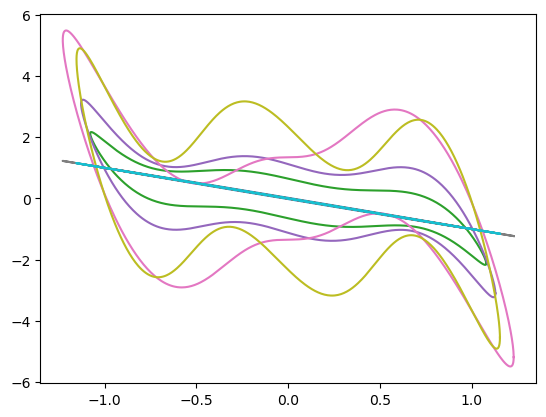

In [31]:
#Plot
index = len(zeta)

for i in [0,29,49,69,89]:
    xt = x(zeta[i],OR[i],a1[i],a2[i],a3[i])
    dxt = dx(zeta[i],OR[i],a1[i],a2[i],a3[i])
    ddxt = ddx(zeta[i],OR[i],a1[i],a2[i],a3[i])

    G = ddxt + 2 * zeta [i] * dxt
    F = - xt
    
    plt.plot(xt,G)
    plt.plot(xt,F)
    
plt.show()